# Projekt - Kryminalna baza danych Chicago 


Podczas projektu zająłem się analizą danych kriminalnych dla miasta Chicago w Stanach Zjednoczonych, która jest dostępna do pobrania pod adresem https://data.cityofchicago.org/api/views/xguy-4ndq/rows.csv?accessType=DOWNLOAD 

#### Tabela korelacji dla danych dostępnych w bazie

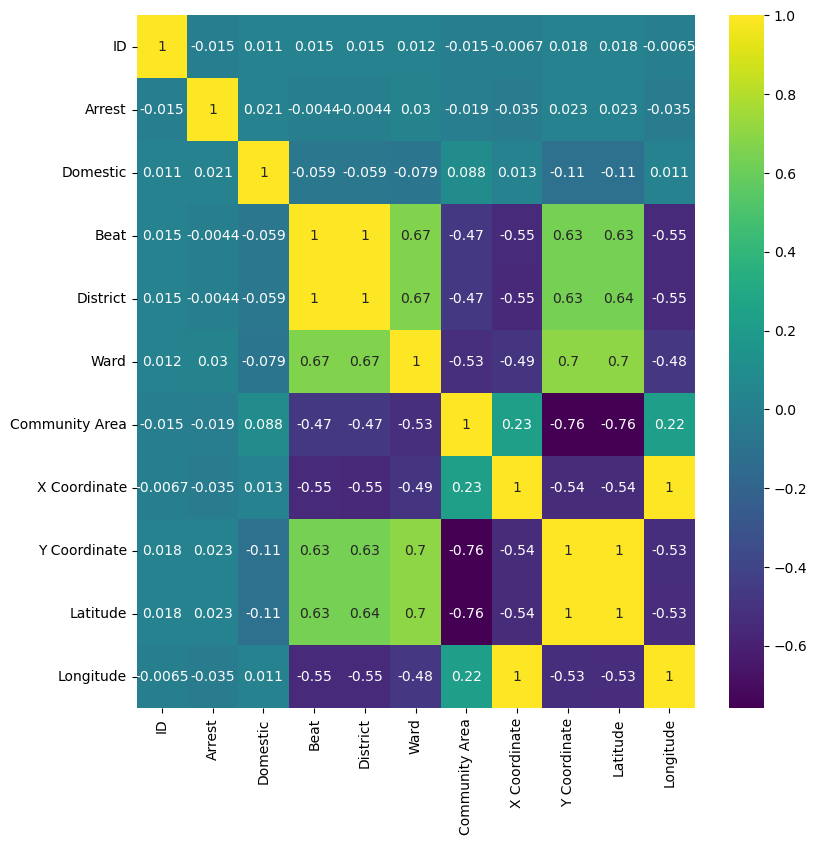

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./crimes.csv")

data = data.drop('Year', axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
fig.set_size_inches(9, 9)
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="viridis", ax=ax)
plt.show()


#### Identyfikatory danych przechowywane w bazie

In [2]:
data = pd.read_csv("./crimes.csv")

print(data.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


#### Drzewo decyzyjne

In [4]:
import pandas as pd

df = pd.read_csv("./crimes.csv")
df["Primary Type"], unique_types = pd.factorize(df["Primary Type"])
for i, typ in enumerate(unique_types):
    print(f"{typ}: {i}")

ASSAULT: 0
CRIMINAL TRESPASS: 1
DECEPTIVE PRACTICE: 2
CRIMINAL DAMAGE: 3
BURGLARY: 4
OTHER OFFENSE: 5
MOTOR VEHICLE THEFT: 6
THEFT: 7
BATTERY: 8
NARCOTICS: 9
WEAPONS VIOLATION: 10
ROBBERY: 11
INTERFERENCE WITH PUBLIC OFFICER: 12
HOMICIDE: 13
CRIMINAL SEXUAL ASSAULT: 14
STALKING: 15
SEX OFFENSE: 16
ARSON: 17
INTIMIDATION: 18
PUBLIC PEACE VIOLATION: 19
OFFENSE INVOLVING CHILDREN: 20
LIQUOR LAW VIOLATION: 21
CONCEALED CARRY LICENSE VIOLATION: 22
KIDNAPPING: 23
OBSCENITY: 24
PROSTITUTION: 25
HUMAN TRAFFICKING: 26
NON-CRIMINAL: 27
PUBLIC INDECENCY: 28
GAMBLING: 29
OTHER NARCOTIC VIOLATION: 30


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

df = pd.read_csv("./crimes.csv")
df["Arrest"] = df["Arrest"].astype(int)
df["Domestic"] = df["Domestic"].astype(int)
df["Primary Type"] = pd.factorize(df["Primary Type"])[0]

features = ["Primary Type", "Domestic"]
X = df[features]
y = df["Arrest"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność: ", accuracy)

dot_data = export_graphviz(model, out_file=None, feature_names=features, class_names=["No Arrest", "Arrest"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render("Chicago Arrests")

graph.view()

Dokładność:  0.9082613150822652


'Chicago Arrests.pdf'

#### Zliczanie liczby przestępstw dla danego dystryktu

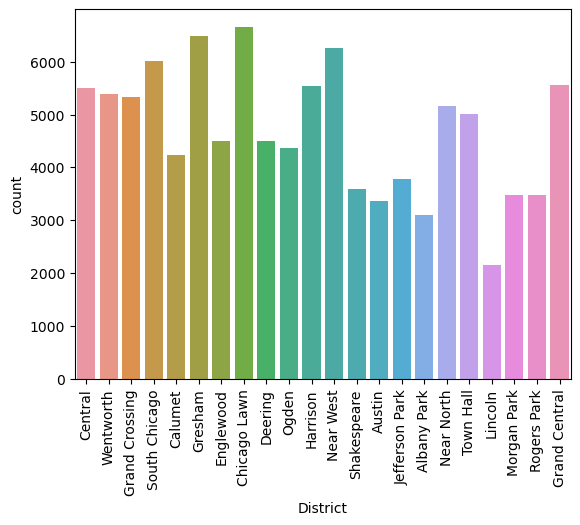

In [8]:
url = "./crimes.csv"
data = pd.read_csv(url)

district_names = {
    1: "Central",
    2: "Wentworth",
    3: "Grand Crossing",
    4: "South Chicago",
    5: "Calumet",
    6: "Gresham",
    7: "Englewood",
    8: "Chicago Lawn",
    9: "Deering",
    10: "Ogden",
    11: "Harrison",
    12: "Near West",
    14: "Shakespeare",
    15: "Austin",
    16: "Jefferson Park",
    17: "Albany Park",
    18: "Near North",
    19: "Town Hall",
    20: "Lincoln",
    22: "Morgan Park",
    24: "Rogers Park",
    25: "Grand Central",
}
 
data = data[data['District'] != 31]
sns.countplot(x="District", data=data)

sns.countplot(x="District", data=data)
plt.xticks(rotation=90)

district_labels = [district_names[int(label.get_text())] for label in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(district_labels)

plt.show()


#### Przedstawienie przestępstw jakie występują dla danego community area

Podaj numer community area (1-77): 12


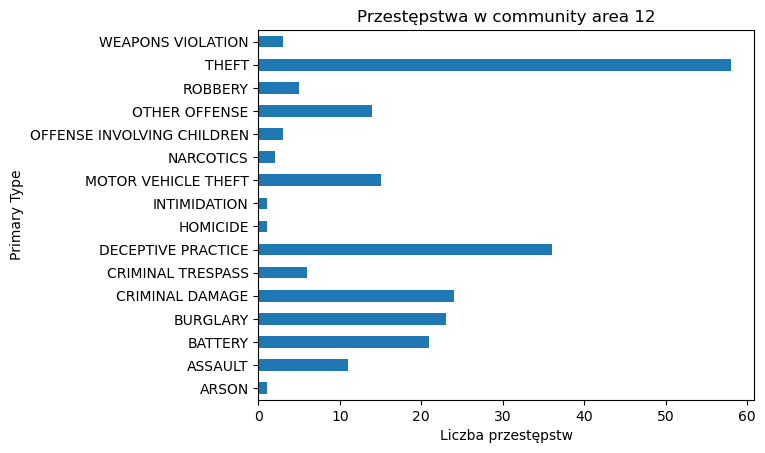

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

url = "./crimes.csv"
df = pd.read_csv(url)

while True:
    area = input("Podaj numer community area (1-77): ")
    if area.isdigit() and 1 <= int(area) <= 77:
        break
    else:
        print("Nieprawidłowy numer community area. Spróbuj ponownie.")

area = int(area)

df_area = df[df["Community Area"] == area]

if df_area.empty:
    print("Brak danych dla podanego community area.")
else:
    crimes = df_area.groupby("Primary Type").size()

    crimes.plot(kind="barh")
    plt.title(f"Przestępstwa w community area {area}")
    plt.xlabel("Liczba przestępstw")
    plt.show()

#### Heat mapa dla przestępstw związanych z kradzieżami pojazdów silnikowych

In [8]:
import pandas as pd
import folium
from folium.plugins import HeatMap

data = pd.read_csv("./crimes.csv")

data = data[data["Primary Type"] == "MOTOR VEHICLE THEFT"]

grouped_data = data.groupby(["Latitude", "Longitude"]).size().reset_index(name='counts')

grouped_data = grouped_data.nlargest(1000, 'counts')

mapa = folium.Map(location=[41.8781, -87.6298], zoom_start=10)
HeatMap(data=grouped_data[['Latitude', 'Longitude', 'counts']], radius=15).add_to(mapa)

mapa


#### Program do sprawdzania w ilu procentach dla danego dystryktu i typu przestępstwa dochodzi do aresztowania



 Dystrykty:
1 Central
2 Wentworth
3 Grand Crossing
4 South Chicago
5 Calumet
6 Gresham
7 Englewood
8 Chicago Lawn
9 Deering
10 Ogden
11 Harrison
12 Near West
14 Shakespeare
15 Austin
16 Jefferson Park
17 Albany Park
18 Near North
19 Town Hall
20 Lincoln
22 Morgan Park
24 Rogers Park
25 Grand Central

 Wybierz dystrykt (1-25): 1
Dostępne typy przestępstw:
1: OTHER OFFENSE
2: NARCOTICS
3: CRIMINAL DAMAGE
4: THEFT
5: WEAPONS VIOLATION
6: ASSAULT
7: DECEPTIVE PRACTICE
8: MOTOR VEHICLE THEFT
9: CRIMINAL TRESPASS
10: BATTERY
11: INTIMIDATION
12: ROBBERY
13: BURGLARY
14: PUBLIC PEACE VIOLATION
15: SEX OFFENSE
16: OFFENSE INVOLVING CHILDREN
17: STALKING
18: CRIMINAL SEXUAL ASSAULT
19: INTERFERENCE WITH PUBLIC OFFICER
20: KIDNAPPING
21: ARSON
22: HOMICIDE
23: LIQUOR LAW VIOLATION
24: GAMBLING

 Wybierz typ przestępstwa: 2


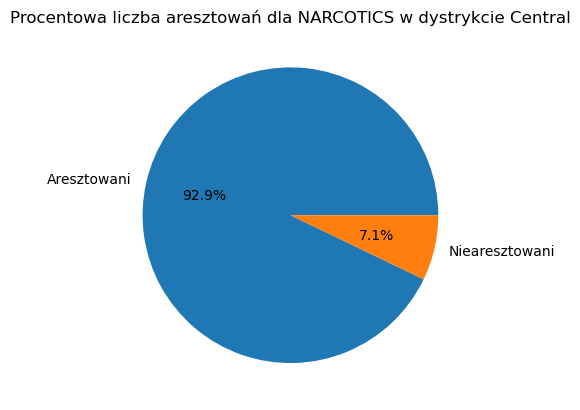

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

url = "./crimes.csv"
data = pd.read_csv(url)

district_names = {
    1: "Central",
    2: "Wentworth",
    3: "Grand Crossing",
    4: "South Chicago",
    5: "Calumet",
    6: "Gresham",
    7: "Englewood",
    8: "Chicago Lawn",
    9: "Deering",
    10: "Ogden",
    11: "Harrison",
    12: "Near West",
    14: "Shakespeare",
    15: "Austin",
    16: "Jefferson Park",
    17: "Albany Park",
    18: "Near North",
    19: "Town Hall",
    20: "Lincoln",
    22: "Morgan Park",
    24: "Rogers Park",
    25: "Grand Central"
}

print("\n Dystrykty:")
for key, value in district_names.items():
    print(key, value)

district = int(input("\n Wybierz dystrykt (1-25): "))
if district not in district_names.keys():
    print("\n Nieprawidłowy numer dystryktu!")
else:
    district_data = data[data["District"] == district]

    offense_names = {}
    for offense in district_data["Primary Type"].unique():
        offense_names[len(offense_names) + 1] = offense

    print("Dostępne typy przestępstw:")
    for key, value in offense_names.items():
        print(f"{key}: {value}")

    offense = int(input("\n Wybierz typ przestępstwa: "))
    if offense not in offense_names.keys():
        print("\n Nieprawidłowy numer typu przestępstwa!")
    else:
        offense_data = district_data[district_data["Primary Type"] == offense_names[offense]]

        arrested_count = offense_data["Arrest"].value_counts().get(True, 0)
        not_arrested_count = offense_data.shape[0] - arrested_count

        plt.pie([arrested_count, not_arrested_count], labels=["Aresztowani", "Niearesztowani"], autopct="%1.1f%%")
        plt.title(f"Procentowa liczba aresztowań dla {offense_names[offense]} w dystrykcie {district_names[district]}")
        plt.show()


#### Mapa przedstawiająca aresztowania związane z narkotykami

In [15]:
import pandas as pd
import folium

df = pd.read_csv('./crimes.csv')

m = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

valid_districts = [
    "Central", "Wentworth", "Grand Crossing", "South Chicago", "Calumet", "Gresham",
    "Englewood", "Chicago Lawn", "Deering", "Ogden", "Harrison", "Near West", "Shakespeare",
    "Austin", "Jefferson Park", "Albany Park", "Near North", "Town Hall", "Lincoln",
    "Morgan Park", "Rogers Park", "Grand Central"
]

for index, row in df.iterrows():
    if row['Primary Type'] == 'NARCOTICS' and not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude']):
        if row['Arrest']:
            color = 'green'
        else:
            color = 'yellow'
        if row['District'] in valid_districts:
            opacity = 0.5
        else:
            opacity = 1
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=10,
            color='black',
            fill=True,
            fill_opacity=opacity,
            fill_color=color
        ).add_to(m)

m


#### Program do analizy przestępstw w danym dniu tygodnia


Dystrykty:
1 Central
2 Wentworth
3 Grand Crossing
4 South Chicago
5 Calumet
6 Gresham
7 Englewood
8 Chicago Lawn
9 Deering
10 Ogden
11 Harrison
12 Near West
14 Shakespeare
15 Austin
16 Jefferson Park
17 Albany Park
18 Near North
19 Town Hall
20 Lincoln
22 Morgan Park
24 Rogers Park
25 Grand Central

Wybierz dystrykt (1-25): 14
Dostępne typy przestępstw:
1: THEFT
2: BATTERY
3: CRIMINAL DAMAGE
4: ROBBERY
5: STALKING
6: MOTOR VEHICLE THEFT
7: CRIMINAL TRESPASS
8: DECEPTIVE PRACTICE
9: BURGLARY
10: OTHER OFFENSE
11: WEAPONS VIOLATION
12: ASSAULT
13: SEX OFFENSE
14: NARCOTICS
15: OFFENSE INVOLVING CHILDREN
16: LIQUOR LAW VIOLATION
17: CRIMINAL SEXUAL ASSAULT
18: INTIMIDATION
19: INTERFERENCE WITH PUBLIC OFFICER
20: PROSTITUTION
21: PUBLIC PEACE VIOLATION
22: KIDNAPPING
23: ARSON
24: CONCEALED CARRY LICENSE VIOLATION

Wybierz typ przestępstwa: 9


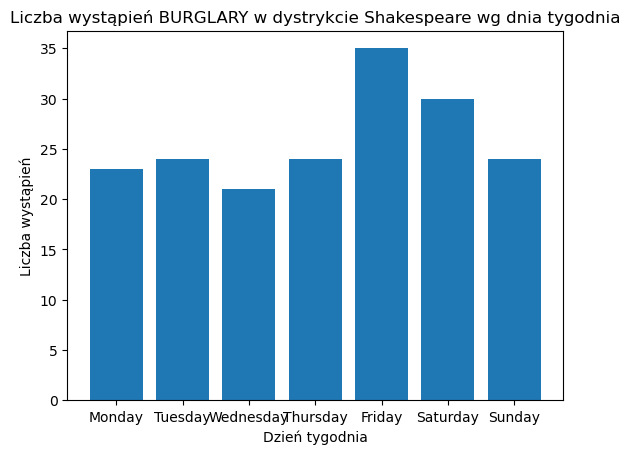

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

url = "./crimes.csv"
data = pd.read_csv(url)

district_names = {
    1: "Central",
    2: "Wentworth",
    3: "Grand Crossing",
    4: "South Chicago",
    5: "Calumet",
    6: "Gresham",
    7: "Englewood",
    8: "Chicago Lawn",
    9: "Deering",
    10: "Ogden",
    11: "Harrison",
    12: "Near West",
    14: "Shakespeare",
    15: "Austin",
    16: "Jefferson Park",
    17: "Albany Park",
    18: "Near North",
    19: "Town Hall",
    20: "Lincoln",
    22: "Morgan Park",
    24: "Rogers Park",
    25: "Grand Central"
}

print("\nDystrykty:")
for key, value in district_names.items():
    print(key, value)

district = int(input("\nWybierz dystrykt (1-25): "))
if district not in district_names.keys():
    print("\nNieprawidłowy numer dystryktu!")
else:
    district_data = data[data["District"] == district]

    offense_names = {}
    for offense in district_data["Primary Type"].unique():
        offense_names[len(offense_names) + 1] = offense

    print("Dostępne typy przestępstw:")
    for key, value in offense_names.items():
        print(f"{key}: {value}")

    offense = int(input("\nWybierz typ przestępstwa: "))
    if offense not in offense_names.keys():
        print("\nNieprawidłowy numer typu przestępstwa!")
    else:
        offense_data = district_data[district_data["Primary Type"] == offense_names[offense]]

        offense_data = offense_data.assign(Date=pd.to_datetime(offense_data["Date"], format="%m/%d/%Y %I:%M:%S %p"))
        offense_data = offense_data.assign(DayOfWeek=offense_data["Date"].dt.day_name())

        days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        count_by_day = [offense_data[offense_data["DayOfWeek"] == day].shape[0] for day in days]

        plt.bar(days, count_by_day)
        plt.title(f"Liczba wystąpień {offense_names[offense]} w dystrykcie {district_names[district]} wg dnia tygodnia")
        plt.xlabel("Dzień tygodnia")
        plt.ylabel("Liczba wystąpień")
        plt.show()